<h3>Linear Regression📈</h3>

---



<p>A linear Regression is an algorithm which is use to determine a relation between two or more variables called <b><i>dependent variable</i></b> and <b><i>independent variable(s)</i></b>.</p>
<p>It is an predictive modelling technique which is used to predict the result based upon some past results. If there are one independent variable, it is called simple linear regression and if there are mulitple independent variable, it is called multiple linear regression. </p>

In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=UserWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)
%matplotlib inline

<h3>Disclaimer</h3>
<p>The result is not meant for any commercial or reference purpose. This study is purely for educational purpose only. The dataset source is provided by <i>The Spark Foundation</i>.</p>

In [2]:
df = pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<p>This dataset contains data about the performance of students based upon different hour of study.</p>

<h3>What is the shape of dataset?</h3>

In [4]:
print('Number of Rows:',df.shape[0],'\nNumber of Columns:',df.shape[1])

Number of Rows: 25 
Number of Columns: 2


<h3>2-D distribution plot Hours v/s Score</h3>

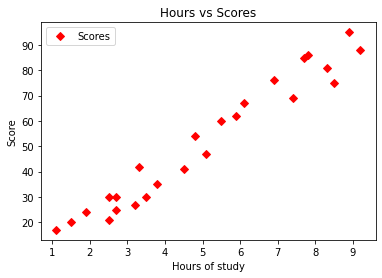

In [5]:
#Reference: https://matplotlib.org/3.1.0/api/markers_api.html
df.plot(x = 'Hours', y = 'Scores',style = 'D',color = 'r')
plt.title('Hours vs Scores')  
plt.xlabel('Hours of study')  
plt.ylabel('Score')  
plt.show()

In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

<h3>Heat-Map</h3>

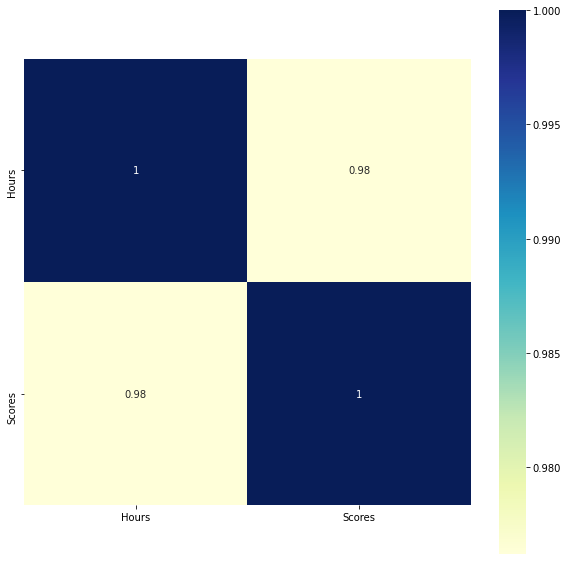

In [8]:
corr = df.corr()
plt.figure(figsize=(10,10))
_ = sns.heatmap(corr,vmax=1,square=True,annot=True,cmap='YlGnBu')

(1.0, 10.0)

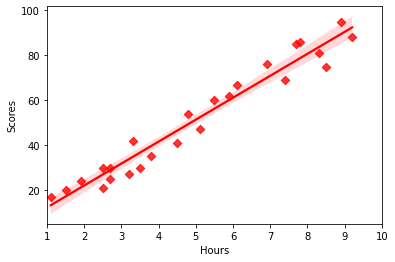

In [14]:
#Regression plot

_ = sns.regplot(x = 'Hours',y = 'Scores',data = df,marker = 'D',color = 'r')
plt.xlim(1,10)

<p>It is clearly seen that their is a positive relation between <b>Hours</b> and <b>Scores</b>.</p>

<h3>Data-splitting</h3>

In [15]:
from sklearn.model_selection import train_test_split
features = df.drop('Scores',axis=1)              
labels = df['Scores']
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,random_state = 10)

<h3>Model-building using linear regression</h3>

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [22]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
Yhat_lr=lr.predict(x_test)
Yhat_lr

array([17.37142335, 52.70292295, 35.03717315, 34.05574261, 46.81433968])

In [26]:
y_test

5     20
1     47
13    42
2     27
12    41
Name: Scores, dtype: int64

In [27]:
lr.intercept_ #scores when hours of study is zero

2.649965189403865

In [28]:
lr.coef_ 

array([9.81430544])

$r{2}$ or Coefficient of Determination

In [34]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,Yhat_lr)

0.6683995499740198

In [31]:
lr.score(x_test,y_test)

0.6683995499740198

In [35]:
mean_squared_error(y_test,Yhat_lr)

34.30075055068739

Distribution plot between predicted and real values

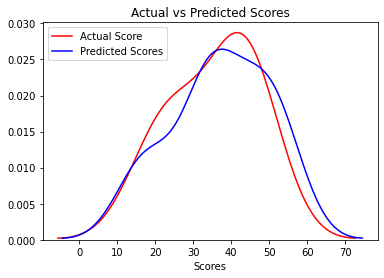

In [32]:
sns.distplot(y_test,hist=False,color='r',label='Actual Score')
plt.title('Actual vs Predicted Scores')
g=sns.distplot(Yhat_lr,hist=False,color='b',label='Predicted Scores')

In [33]:
df1 = pd.DataFrame({'Actual':y_test,'Predicted':Yhat_lr})
df1

,Actual,Predicted
5,20,17.371423
1,47,52.702923
13,42,35.037173
2,27,34.055743
12,41,46.814340


In [51]:
#Predicting the score of a student who studies 9.25 hours
round(lr.predict(np.array([9.25]).reshape(1,1))[0],2)

93.43

In [50]:
#predicting the score of students who studies different hours

for i in range(5,10):
    print('Student who studies',i,
          'hours can score {:.2f}'.format(lr.predict(np.array([i]).reshape(1,1))[0]))

Student who studies 5 hours can score 51.72
Student who studies 6 hours can score 61.54
Student who studies 7 hours can score 71.35
Student who studies 8 hours can score 81.16
Student who studies 9 hours can score 90.98
